# **Aprendizaje por refuerzo**

## GridWorld with SARSA and Q-learning

*Autores: Ignacio Cordova Pou, Bruno Muñoz Marcos y Daniel Beteta Francisco*

**GridWorld** es un mundo en forma de cuadrícula muy utilizado como entorno de pruebas para técnicas de Aprendizaje por Refuerzo. Dentro de esta cuadrícula hay varios tipos de celdas: iniciales, libres, obstáculos, terminales... ¡y ahora también agujeros de gusano! Los agentes tienen que llegar desde una celda inicial hasta otra terminal evitando los obtáculos y recorriendo una distancia mínima.

Paquetes necesarios para *GridWorld 2*:

In [ ]:
import numpy as np
import math
from utils import *
from world import *

Funciones auxiliares para visualizar información:

In [ ]:
from visualizations import *

# Clase *World*:

Esta clase almacena la información del mundo:

*   *Map*: Matriz con la codificación del mundo con celdas libres (0), obstáculos (-1) y terminales (1)
*   *Size*: Vector con el tamaño de la matriz de codificación del mundo (ancho, alto)

Para crear un mundo hay que aportar los siguientes datos:

*   Tamaño del mapa (ancho, alto)
*   Lista de celdas terminales
*   Lista de celdas con obstáculos
*   Agujero de gusano

Notas:

* Cuando el agente cae en un obstáculo se queda atrapado para siempre en él
* Cuando el agente entra por un extremo del agujero de gusano sale por el otro extremo

Por ejemplo:

w = World((10, 10), [(9, 9)], [(2, 4), (4, 2)], [(0, 2), (9, 7)])

Crea un mundo de 10 filas y 10 columnas con un estado terminal (9, 9), dos obstáculos en (2, 4) y (4, 2) y un teletransporte entre (0, 2) y (9, 7).

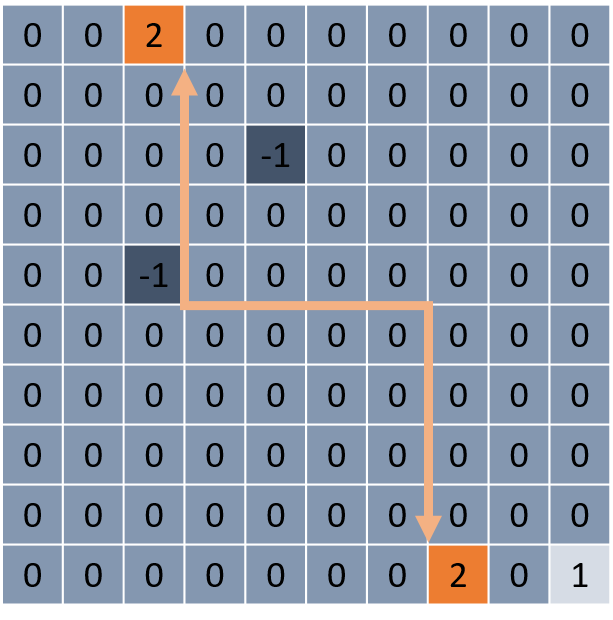

Prueba de la clase *World*:

In [ ]:
if __name__ == "__main__":
  w = World((10, 10), [(9, 9)], [(2, 4), (4, 2)], [(0, 2), (9, 7)])
  print_map(w)

[ O  O  T  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  X  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  X  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  T  O  F ]



# Clase *Agent*:

Esta clase controla el agente que aprende por refuerzo en *GridWorld*.

Para crear un agente se necesitan los siguientes datos:

*   *World*: Mundo en el que se desenvuelve el agente.
*   *Initial State*: Estado inicial del agente.

Para controlar el agente se usan los siguientes métodos:

*   *nextState = move(state, action)*: Mueve el agente del estado *state* a un nuevo estado *nextState* aplicando una acción *action*.
*   *reward = reward(nextState)*: Devuelve el refuerzo *reward* que recibe el agente al transicionar al estado *nextState*.
*   *nextState, reward = checkAction(state, action)*: Comprueba a qué estado *nextState* y con qué refuerzo *reward* cambia el agente al aplicar la acción *action* en el estado *state*. Este método no cambia el estado interno del agente, por lo que puede usarse para hacer barridos del espacio de estados.
*   *nextState, reward = executeAction(action)*: Ejecuta la acción *action* en el estado actual y devuelve el nuevo estado *nextState* y el refuerzo *reward*. Este método cambia el estado interno del agente, por lo que sólo debe usarse cuando se realice un recorrido por el mundo.

Nota: Podéis hacer cambios en el agente (distribución de refuerzos, comportamiento en obstáculos...) buscando mejorar el rendimiento de los algoritmos.

In [ ]:
from agent import Agent

INITIAL_STATE = (0, 0)

Prueba de la clase *Agent*:

In [ ]:
if __name__ == "__main__":
  # Crear el mundo
  w = World((10, 10), [(9, 9)], [(2, 4), (4, 2)], [(0, 2), (9, 7)])
  print_map(w)
  # Crear el agente
  a = Agent(
      world=w, initial_state=INITIAL_STATE,
      obstacle_reward=-1,
      terminal_reward=1,
      free_celd_reward=0
  )
  # Mover el agente en la diagonal principal
  for i in range(1, 5):
    # Mostrar cada nuevo estado y su recompensa
    print(a.execute_action((0, 1)))

[ O  O  T  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  X  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  X  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  O  O  O 
 O  O  O  O  O  O  O  T  O  F ]

(array([0, 1]), 0)
(array([9, 7]), 0)
(array([9, 8]), 0)
(array([9, 9]), 1)


# Trabajo:

En este trabajo vais a implementar los dos algoritmos más comunes de aprendizaje por refuerzo basados en el valor: SARSA y QLearning. Además, vais a probar ambos algoritmos en una serie de escenarios para evaluar su funcionamiento y comparar sus resultados.

## Mundos:

Para probar los algoritmos se ofrecen los siguientes mundos en varios tamaños:

*   Mundo 1: Laberinto fácil que se puede recorrer en zigzag
*   Mundo 2: Mundo con obstáculos aleatorios en el que el teletransporte acorta la distancia desde el inicio hasta el final
*   Mundo 3: Mundo con obstáculos aleatorios en el que el teletransporte no reduce la distancia desde el inicio hasta el final
*   Mundo 4: Laberinto difícil con caminos correctos y equivocados

Nota: Sentíos libres de utilizar todos o algunos de estos escenarios o directamente crear vuestros propios escenarios.

In [ ]:
if __name__ == "__main__":

  # Mundo 1 pequeño: Laberinto fácil
  obstacles = []
  for j in range(0, 4):
    obstacles.append((j, 1))
  for j in range(1, 5):
    obstacles.append((j, 3))
  w1p = World((5, 5), [(4, 4)], obstacles, [])
  print("World 1: ")
  print_map(w1p)

  # Mundo 1 mediano: Laberinto fácil
  obstacles = []
  for i in [1, 5]:
    for j in range(0, 8):
      obstacles.append((j, i))
  for i in [3, 7]:
    for j in range(1, 9):
      obstacles.append((j, i))
  w1m = World((9, 9), [(8, 8)], obstacles, [])
  print("World 1: ")
  print_map(w1m)

  # Mundo 1 grande: Laberinto fácil
  obstacles = []
  for i in [1, 5, 9, 13, 17]:
    for j in range(0, 20):
      obstacles.append((j, i))
  for i in [3, 7, 11, 15, 19]:
    for j in range(1, 21):
      obstacles.append((j, i))
  w1g = World((21, 21), [(20, 20)], obstacles, [])
  print("World 1: ")
  print_map(w1g)

  # Mundo 2 pequeño: Obstáculos aleatorios, teletransporte útil
  obstacles = []
  for i in range(3):
    obstacles.append((np.random.randint(1, 4), np.random.randint(1, 4)))
  w2p = World((5, 5), [(4, 4)], obstacles, [(2, 0), (4, 2)])
  print("World 2: ")
  print_map(w2p)

  # Mundo 2 mediano: Obstáculos aleatorios, teletransporte útil
  obstacles = []
  for i in range(10):
    obstacles.append((np.random.randint(1, 9), np.random.randint(1, 9)))
  w2m = World((10, 10), [(9, 9)], obstacles, [(3, 1), (8, 6)])
  print("World 2: ")
  print_map(w2m)

  # Mundo 2 grande: Obstáculos aleatorios, teletransporte útil
  obstacles = []
  for i in range(50):
    obstacles.append((np.random.randint(1, 19), np.random.randint(1, 19)))
  w2g = World((21, 21), [(20, 20)], obstacles, [(6, 2), (18, 14)])
  print("World 2: ")
  print_map(w2g)

  # Mundo 3 pequeño: Obstáculos aleatorios, teletransporte inútil
  obstacles = []
  for i in range(3):
    obstacles.append((np.random.randint(1, 4), np.random.randint(1, 4)))
  w3p = World((5, 5), [(4, 4)], obstacles, [(4, 0), (0, 4)])
  print("World 3: ")
  print_map(w3p)

  # Mundo 3 mediano: Obstáculos aleatorios, teletransporte inútil
  obstacles = []
  for i in range(10):
    obstacles.append((np.random.randint(1, 9), np.random.randint(1, 9)))
  w3m = World((10, 10), [(9, 9)], obstacles, [(8, 1), (1, 8)])
  print("World 3: ")
  print_map(w3m)

  # Mundo 3 grande: Obstáculos aleatorios, teletransporte inútil
  obstacles = []
  for i in range(50):
    obstacles.append((np.random.randint(1, 19), np.random.randint(1, 19)))
  w3g = World((21, 21), [(20, 20)], obstacles, [(18, 2), (2, 18)])
  print("World 3: ")
  print_map(w3g)

  # Mundo 4: Laberinto difícil
  obstacles = [(0,1),(0,3),(0,9),(0,15),(0,16),(0,17),(0,19),
               (1,1),(1,3),(1,4),(1,5),(1,6),(1,7),(1,9),(1,10),(1,11),(1,12),(1,13),(1,17),(1,19),
               (2,1),(2,9),(2,13),(2,15),(2,16),(2,17),(2,19),
               (3,1),(3,3),(3,5),(3,7),(3,9),(3,11),(3,16),(3,19),
               (4,3),(4,5),(4,7),(4,8),(4,9),(4,10),(4,11),(4,12),(4,13),(4,14),(4,16),(4,18),(4,19),
               (5,0),(5,1),(5,2),(5,3),(5,5),(5,9),(5,16),
               (6,5),(6,6),(6,7),(6,9),(6,10),(6,11),(6,12),(6,13),(6,14),(6,16),(6,17),(6,19),
               (7,0),(7,1),(7,2),(7,3),(7,5),(7,7),(7,9),(7,19),
               (8,3),(8,7),(8,8),(8,9),(8,12),(8,13),(8,14),(8,15),(8,16),(8,17),(8,18),(8,19),
               (9,1),(9,3),(9,5),(9,7),(9,11),(9,12),(9,19),(9,20),
               (10,1),(10,3),(10,5),(10,6),(10,7),(10,9),(10,11),(10,14),(10,15),(10,16),(10,17),
               (11,1),(11,3),(11,5),(11,9),(11,11),(11,13),(11,14),(11,17),(11,18),(11,19),
               (12,1),(12,5),(12,6),(12,8),(12,9),(12,11),(12,13),(12,19),
               (13,1),(13,2),(13,3),(13,4),(13,5),(13,8),(13,15),(13,16),(13,17),(13,19),
               (14,4),(14,7),(14,8),(14,10),(14,12),(14,13),(14,15),(14,19),
               (15,0),(15,1),(15,2),(15,6),(15,7),(15,10),(15,13),(15,14),(15,15),(15,17),(15,18),(15,19),(15,20),
               (16,2),(16,3),(16,5),(16,6),(16,7),(16,8),(16,9),(16,10),(16,11),(16,15),(16,17),
               (17,0),(17,3),(17,5),(17,9),(17,13),(17,14),(17,15),(17,17),(17,19),
               (18,0),(18,1),(18,5),(18,6),(18,7),(18,9),(18,10),(18,11),(18,15),(18,19),
               (19,1),(19,2),(19,4),(19,5),(19,11),(19,13),(19,14),(19,15),(19,16),(19,17),(19,18),(19,19),
               (20,7),(20,8),(20,9),(20,11),(20,19)]
  print("World 4: ")
  w4 = World((21, 21), [(20, 20)], obstacles, [])
  print_map(w4)

World 1: 
[ O  X  O  O  O 
 O  X  O  X  O 
 O  X  O  X  O 
 O  X  O  X  O 
 O  O  O  X  F ]

World 1: 
[ O  X  O  O  O  X  O  O  O 
 O  X  O  X  O  X  O  X  O 
 O  X  O  X  O  X  O  X  O 
 O  X  O  X  O  X  O  X  O 
 O  X  O  X  O  X  O  X  O 
 O  X  O  X  O  X  O  X  O 
 O  X  O  X  O  X  O  X  O 
 O  X  O  X  O  X  O  X  O 
 O  O  O  X  O  O  O  X  F ]

World 1: 
[ O  X  O  O  O  X  O  O  O  X  O  O  O  X  O  O  O  X  O  O  O 
 O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O 
 O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O 
 O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O 
 O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O 
 O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O 
 O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O 
 O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O 
 O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O 
 O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  O  X  

In [ ]:
MAPS = [
  ("Mundo 1 pequeño: Laberinto fácil", w1p, 100),
  ("Mundo 1 mediano: Laberinto fácil", w1m, 1000),
  ("Mundo 1 grande: Laberinto fácil", w1g, 30000),
  ("Mundo 2 pequeño: Obstáculos aleatorios, teletransporte útil", w2p, 100),
  ("Mundo 2 mediano: Obstáculos aleatorios, teletransporte útil", w2m, 1000),
  ("Mundo 2 grande: Obstáculos aleatorios, teletransporte útil", w2g, 30000),
  ("Mundo 3 pequeño: Obstáculos aleatorios, teletransporte inútil", w3p, 100),
  ("Mundo 3 mediano: Obstáculos aleatorios, teletransporte inútil", w3m, 1000),
  ("Mundo 3 grande: Obstáculos aleatorios, teletransporte inútil", w3g, 30000),
  ("Mundo 4: Laberinto difícil", w4, 30000)
]

## SARSA:

*SARSA* (State-Action-Reward-State-Action) es un método basado en el valor que permite resolver problemas de aprendizaje por refuerzo. Al igual que el resto de métodos basados en el valor, *SARSA* calcula de forma iterativa la función de valor $Q(S,A)$ y, a partir de ella, determina la política óptima $\pi$.

*SARSA* recibe su nombre de las cinco variables implicadas en su función de actualización: el estado actual ($S_t$), la acción actual ($A_t$), el refuerzo actual ($R_t$), el siguiente estado ($S_{t+1}$) y la siguiente acción ($A_{t+1}$). Esta función de actualización tiene la siguiente forma:

\begin{equation}
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha [R_t + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t,A_t)]
\end{equation}

Nota: $\alpha$ es la longitud del episodio y $\gamma$ el factor de descuento.

El algoritmo *SARSA* sigue el siguiente esquema:

1.   Inicializar $Q(S,A)$ para todos los estados y acciones
2.   **Bucle** (repetir $3-9$ hasta la convergencia):
3.   Inicializar $S_t$
4.   Elegir $A_t$ en $S_t$ siguiendo la política derivada de $Q(S,A)$
5.   **Bucle** (repetir $6-9$ hasta que $S_t$ sea terminal):
6.   Tomar la acción $A_t$ en $S_t$ y observar $R_t$ y $S_{t+1}$
7.   Elegir $A_{t+1}$ en $S_{t+1}$ siguiendo la política derivada de $Q(S,A)$
8.   Actualizar el valor $Q(S_t, A_t)$ con la función de actualización
9.   Tomar $S_{t+1}$ y $A_{t+1}$ como los nuevos $S_t$ y $A_t$

El algoritmo *SARSA* utiliza un parámetro $\epsilon \in (0, 1)$ para buscar un equilibrio entre exploración y explotación. A la hora de elegir $A_t$ en $S_t$, si un número aleatorio es menor que $\epsilon$, el algoritmo tomará una acción aleatoria; mientras que si ese número aleatorio es mayor que $\epsilon$, el algoritmo tomará la mejor acción conocida.

## Ejercicio 1:

Implementad el algoritmo SARSA para el agente y entorno definidos anteriormente.

In [ ]:
from utils import get_agent_policy
from visualizations import show_policy

In [ ]:
def SARSA_optimization(Q, R, S, alpha, gamma, next_S, A_id, next_A_id):
    return (
        Q[S[0], S[1], A_id]
        + alpha*(R + gamma*Q[next_S[0], next_S[1], next_A_id]
                   - Q[S[0], S[1], A_id])
    )

In [ ]:
for world_name, world, amount_of_episodes in MAPS:
    agent = Agent(
      world=world, initial_state=INITIAL_STATE,
      obstacle_reward=-1,
      terminal_reward=1,
      free_celd_reward=0
    )
    value_function_q, policy, converged, episodes, path_length = get_agent_policy(
      world, agent, alpha=0.1, epsilon=0.01,
      gamma=1.0, decay=1, decay_rate=10,
      amount_of_episodes=amount_of_episodes,
      update_function=SARSA_optimization, max_steps=1000
    )
    show_policy(world_name, world, policy, converged, episodes, path_length)

Mundo 1 pequeño: Laberinto fácil
[ V  X  >  >  V 
 V  X  ^  X  V 
 V  X  ^  X  V 
 V  X  ^  X  V 
 >  >  ^  X  ★]

Converged: True
Episodes needed to converge: 56
Length of the path taken: 16

Mundo 1 mediano: Laberinto fácil
[ V  X  >  >  V  X  >  >  V 
 V  X  ^  X  V  X  ^  X  V 
 V  X  ^  X  V  X  ^  X  V 
 V  X  ^  X  V  X  ^  X  V 
 V  X  ^  X  V  X  ^  X  V 
 V  X  ^  X  V  X  ^  X  V 
 V  X  ^  X  V  X  ^  X  V 
 V  X  ^  X  V  X  ^  X  V 
 >  >  ^  X  >  >  ^  X  ★]

Converged: True
Episodes needed to converge: 319
Length of the path taken: 48

Mundo 1 grande: Laberinto fácil
[ V  X  >  >  V  X  >  >  V  X  >  >  V  X  >  >  V  X  >  >  V 
 V  X  ^  X  V  X  ^  X  V  X  ^  X  V  X  ^  X  V  X  ^  X  ^ 
 V  X  ^  X  V  X  ^  X  V  X  ^  X  V  X  ^  X  V  X  ^  X  V 
 V  X  ^  X  V  X  ^  X  V  X  ^  X  V  X  ^  X  V  X  ^  X  > 
 V  X  ^  X  V  X  ^  X  V  X  ^  X  V  X  ^  X  V  X  ^  X  V 
 V  X  ^  X  V  X  ^  X  V  X  ^  X  V  X  ^  X  V  X  ^  X  ^ 
 V  X  ^  X  V  X  ^  X 

## Q-Learning:

*Q-Learning* es el método más conocido para resolver problemas de aprendizaje por refuerzo mediante un esquema basado en el valor. Este algoritmo recibe su nombre directamente de $Q(S,A)$, la función de valor que va actualizando a lo largo de su ejecución. *Q-Learning* es muy parecido a *SARSA*, pero tiene una función de actualización diferente:

\begin{equation}
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha [R_t + \gamma max_a{Q(S_{t+1}}, a) - Q(S_t,A_t)]
\end{equation}

En este caso, la acción $A_{t+1}$ en $S_{t+1}$ se toma buscando el máximo valor, en lugar de poder elegir entre exploración o explotación.

El algoritmo *Q-Learning* sigue el siguiente esquema:

1.   Inicializar $Q(S,A)$ para todos los estados y acciones
2.   **Bucle** (repetir $3-8$ hasta la convergencia):
3.   Inicializar $S_t$
4.   **Bucle** (repetir $6-8$ hasta que $S_t$ sea terminal):
5.   Elegir $A_t$ en $S_t$ siguiendo la política derivada de $Q(S,A)$
6.   Tomar la acción $A_t$ en $S_t$ y observar $R_t$ y $S_{t+1}$
7.   Actualizar el valor $Q(S_t, A_t)$ con la función de actualización
8.   Tomar $S_{t+1}$ como el nuevo $S_t$

## Ejercicio 2:
Implementad el algoritmo Q-Learning para el agente y entorno definidos anteriormente.


In [ ]:
def Q_learning_optimization(Q, R, S, alpha, gamma, next_S, A_id, next_A_id):
    max_act = np.max(Q[next_S[0], next_S[1], :])

    return (
        Q[S[0], S[1], A_id]
        + alpha*(R + gamma*max_act - Q[S[0], S[1], A_id])
    )

In [ ]:
for world_name, world, amount_of_episodes in MAPS:
    agent = Agent(
      world=world, initial_state=INITIAL_STATE,
      obstacle_reward=-1,
      terminal_reward=1,
      free_celd_reward=0
    )
    value_function_q, policy, converged, episodes, path_length = get_agent_policy(
      world, agent, alpha=0.1, epsilon=0.01,
      gamma=1.0, decay=1, decay_rate=10,
      amount_of_episodes=amount_of_episodes,
      update_function=Q_learning_optimization, max_steps=1000
    )
    show_policy(world_name, world, policy, converged, episodes, path_length)

Mundo 1 pequeño: Laberinto fácil
[ V  X  >  >  V 
 V  X  ^  X  V 
 V  X  ^  X  V 
 V  X  ^  X  V 
 >  >  ^  X  ★]

Converged: True
Episodes needed to converge: 51
Length of the path taken: 16

Mundo 1 mediano: Laberinto fácil
[ ^  X  ^  ^  ^  X  >  >  V 
 ^  X  ^  X  ^  X  ^  X  V 
 ^  X  ^  X  ^  X  ^  X  V 
 ^  X  ^  X  V  X  ^  X  V 
 ^  X  ^  X  V  X  ^  X  V 
 ^  X  ^  X  V  X  ^  X  V 
 ^  X  ^  X  V  X  ^  X  V 
 ^  X  ^  X  V  X  ^  X  V 
 ^  V  ^  X  >  >  ^  X  ★]

Converged: False
Episodes needed to converge: 1000
Length of the path taken: -1

Mundo 1 grande: Laberinto fácil
[ ^  X  ^  ^  ^  X  ^  ^  ^  X  ^  ^  ^  X  ^  ^  ^  X  ^  ^  ^ 
 ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^ 
 ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^ 
 ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^ 
 ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^ 
 ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^  X  ^ 
 ^  X  ^  X  ^  X  ^  

## Análisis:

*SARSA* y *Q-Learning* son dos algoritmos muy parecidos, que se pueden aplicar en los mismos problemas y suelen encontrar soluciones similares. No obstante, los resultados de ambos algoritmos pueden diferir en ciertos problemas: por ejemplo, hay un problema llamado Cliffworld en el que SARSA encuentra soluciones más seguras y con menos valor, mientras que Q-Learning asume más riesgos y consigue más valor ([artículo interesante](https://medium.com/gradientcrescent/fundamentals-of-reinforcement-learning-navigating-cliffworld-with-sarsa-and-q-learning-cc3c36eb5830)).

## Ejercicio 3:

Analizad los resultados obtenidos por ambos algoritmos en los escenarios de prueba.

1.   Comentad el rendimiento que observáis en ambos algoritmos. ¿Qué problemas son capaces de resolver? ¿En cuáles no encuentran la solución óptima? ¿A qué se puede deber este comportamiento?

     En las secciones previas, llevamos a cabo la ejecución de ambos algoritmos en todos los escenarios de prueba, teniendo en cuenta los diferentes comportamientos del agente implementado. Finalmente hemos observado que:

     * SARSA: Se puede observar claramente como SARSA da un buen desempeño a la hora de resolver estos laberintos ya que los resuelve todos menos el laberinto grande del Mundo 1, todos los demás quedan resueltos con más o menos episodios. Cabe a destacar que el laberinto mediano del mundo 1 y los laberintos grandes de los mundos 3 y 4 son los que mñas episodios necesitan especialmente el del mundo 4. La hipótesis de por que no ha convergido para el laberinto grande del Mundo 1 y ha convergido tras muchos episodios para los otros laberintos es que al asignar un refuerzo levemente negativo a las casillas vacías, el agente requiere un mayor número de iteraciones (o una calibración más precisa de los parámetros) para hallar la salida en este tipo de mapas. Esto se debe a que no estamos alterando el comportamiento en los obstáculos, lo que aumenta la probabilidad de que el agente quede atrapado en uno de ellos en algún momento. Como resultado, el agente tendría que reiniciar en el siguiente episodio sin haber alcanzado un estado terminal real (el objetivo).

     * Q-learning: Con Q-learning los resultados a la hora de resolver laberintos son claramente peores, esto se debe a que, no es capz de resolver del Mundo 1 los laberintos medianos y grandes y del Mundo 4 el grande, teniendo un mejor desempeño en los mundos 2 y 3 los cuales los resulve todos. La hipótesis de porque no resuleve ciertos mapas creemos que es la misma que la de SARSA. Por otro lado se observa que Q-learning tarda prácticamente el doble de tiempo que SARSA en ejecutarse.





2.   Comentad las diferencias entre los algoritmos en los diferentes escenarios: ¿Cuál resuelve más escenarios? ¿Cuál converge más rápido? ¿Cuál genera más valor?

        Hemos discutido previamente cuántos escenarios (mapas) cada algoritmo resuelve. En relación con la velocidad de convergencia, los experimentos realizados muestran que es similar para ambos algoritmos; en algunos mapas, SARSA es más rápido, mientras que en otros, Q-Learning lo es. Se ha notado que en mapas más complejos, Q-Learning tarda más en converger (o incluso no llega a hacerlo) con ciertas combinaciones de parámetros.

        En lo que respecta a la función de valor Q, podemos observar cómo se distribuye a lo largo del mapa en la política final:



In [ ]:

world= MAPS[8][1]
world_name = MAPS[8][0]
amount_of_episodes = MAPS[8][2]

agent = Agent(
      world=world, initial_state=INITIAL_STATE,
      obstacle_reward=-1,
      terminal_reward=1,
      free_celd_reward=0
    )
value_function_q_1, policy_1, converged, episodes, path_length = get_agent_policy(
      world, agent, alpha=0.1, epsilon=0.01,
      gamma=1.0, decay=1, decay_rate=10,
      amount_of_episodes=amount_of_episodes,
      update_function=SARSA_optimization, max_steps=1000
    )
value_function_q_2, policy_2, converged, episodes, path_length = get_agent_policy(
      world, agent, alpha=0.1, epsilon=0.01,
      gamma=1.0, decay=1, decay_rate=10,
      amount_of_episodes=amount_of_episodes,
      update_function=Q_learning_optimization, max_steps=1000
    )





Mundo 3 grande SARSA


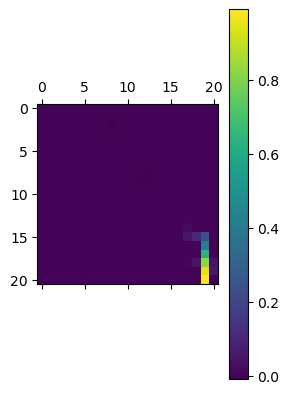

In [ ]:
print('Mundo 3 grande SARSA')
plot_qmap(value_function_q_1)


Mundo 3 grande Q-learning


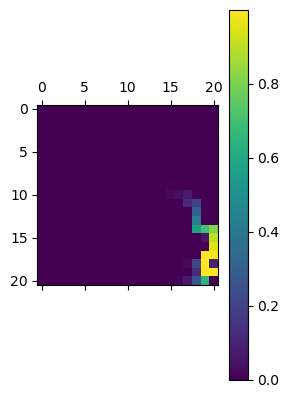

In [ ]:
print('Mundo 3 grande Q-learning')
plot_qmap(value_function_q_2)

Se puede observar que es claramente diferente el mapa que se genera en el mundo 3 grande con Q-learning que con SARSA.

A continuación, examinaremos cuál de las dos técnicas produce mayor valor. Graficaremos la progresión en el tiempo (utilizando la política final) de la función de valor Q para visualizar la comparación:

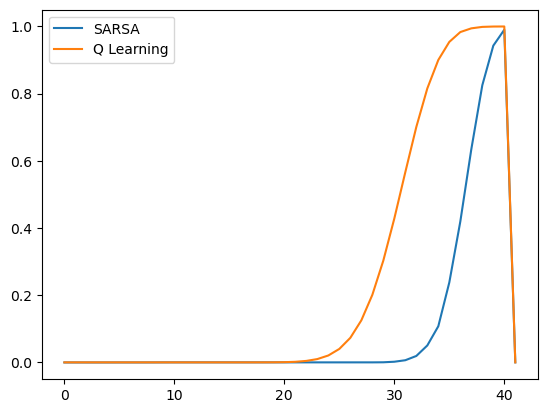

In [ ]:
plot_q_ev(policy_1, world, value_function_q_1, agent, actions=ACTIONS, label="SARSA")
plot_q_ev(policy_2, world, value_function_q_2, agent, actions=ACTIONS, label="Q Learning")
plt.legend()


Observamos que, según lo señalado en el enlace mencionado en el texto original, el enfoque de Q-learning produce un mayor valor a lo largo de los pasos dentro del laberinto. Además, podemos considerar el momento en que el valor empieza a disminuir como el punto de convergencia, ya que indica que se ha alcanzado el objetivo. En este caso, notamos que Q-learning converge más rápidamente.

In [ ]:
world= MAPS[5][1]
world_name = MAPS[5][0]
amount_of_episodes = MAPS[5][2]

agent = Agent(
      world=world, initial_state=INITIAL_STATE,
      obstacle_reward=-1,
      terminal_reward=1,
      free_celd_reward=0
    )
value_function_q_1, policy_1, _, _, path_length = get_agent_policy(
      world, agent, alpha=0.1, epsilon=0.05,
      gamma=1.0, decay=1, decay_rate=10,
      amount_of_episodes=amount_of_episodes,
      update_function=SARSA_optimization, max_steps=2000
    )

value_function_q_2, policy_2 ,_ ,_, path_length = get_agent_policy(
      world, agent, alpha=0.1, epsilon=0.05,
      gamma=0.95, decay=1, decay_rate=10,
      amount_of_episodes=amount_of_episodes,
      update_function=Q_learning_optimization, max_steps=20000
    )


Mundo 2 grande SARSA


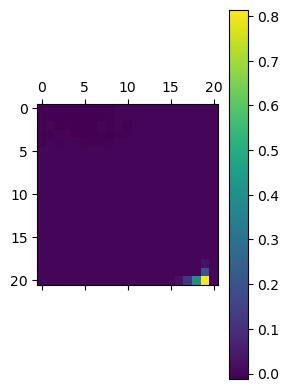

In [ ]:
print('Mundo 2 grande SARSA')
plot_qmap(value_function_q_1)


Mundo 3 grande Q-learning


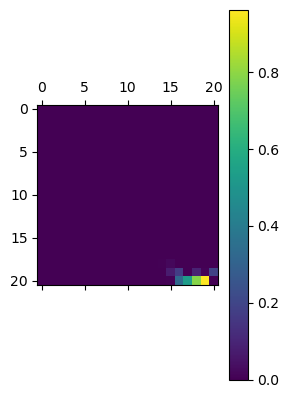

In [ ]:
print('Mundo 3 grande Q-learning')
plot_qmap(value_function_q_2)

Se puede observar que es claramente diferente el mapa que se genera en el mundo 4 con Q-learning que con SARSA.


A continuación, examinaremos cuál de las dos técnicas produce mayor valor. Graficaremos la progresión en el tiempo (utilizando la política final) de la función de valor Q para visualizar la comparación:

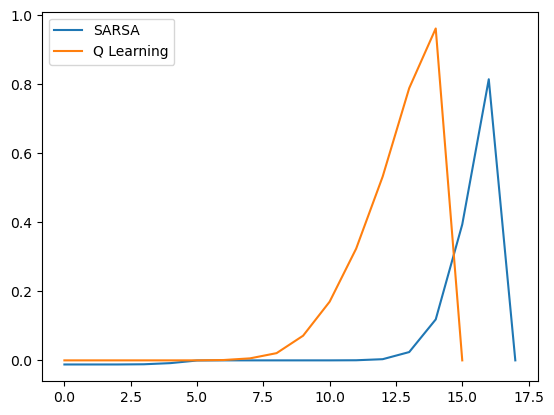

In [ ]:
plot_q_ev(policy_1, world, value_function_q_1, agent, actions=ACTIONS, label="SARSA")
plot_q_ev(policy_2, world, value_function_q_2, agent, actions=ACTIONS, label="Q Learning")
plt.legend()


En este caso el algoritmo de Q learnig converge antes que el de SARSA, pero generan valor aproximadamente de la misma manera.



In [ ]:
world= MAPS[9][1]
world_name = MAPS[9][0]
amount_of_episodes = MAPS[9][2]

agent = Agent(
      world=world, initial_state=INITIAL_STATE,
      obstacle_reward=-1,
      terminal_reward=1,
      free_celd_reward=0
    )
value_function_q_1, policy_1, _, _, path_length = get_agent_policy(
      world, agent, alpha=0.1, epsilon=0.05,
      gamma=1.0, decay=1, decay_rate=10,
      amount_of_episodes=amount_of_episodes,
      update_function=SARSA_optimization, max_steps=2000
    )

value_function_q_2, policy_2 ,_ ,_, path_length = get_agent_policy(
      world, agent, alpha=0.1, epsilon=0.05,
      gamma=0.9, decay=1, decay_rate=10,
      amount_of_episodes=amount_of_episodes,
      update_function=Q_learning_optimization, max_steps=20000
    )


Mundo 4 SARSA


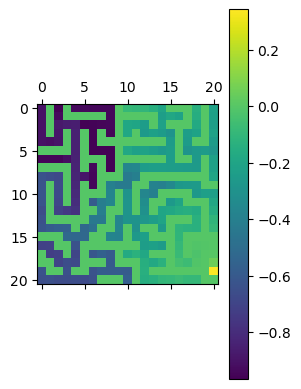

In [ ]:
print('Mundo 4 SARSA')
plot_qmap(value_function_q_1)


Mundo 4 Q-learning


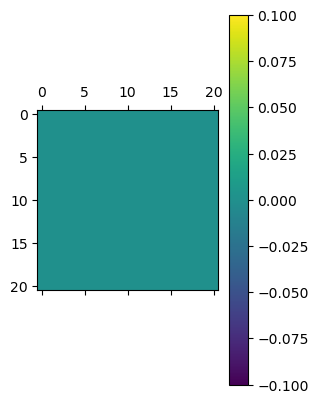

In [ ]:
print('Mundo 4 Q-learning')
plot_qmap(value_function_q_2)

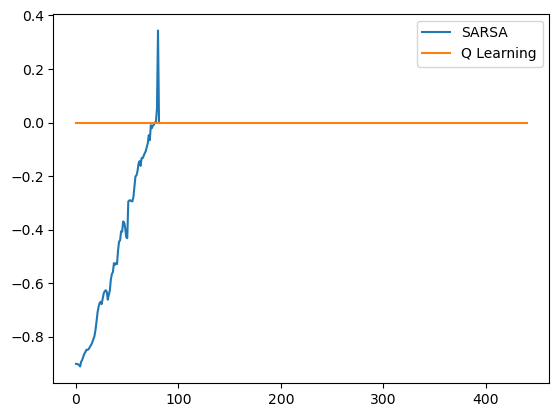

In [ ]:
plot_q_ev(policy_1, world, value_function_q_1, agent, actions=ACTIONS, label="SARSA")
plot_q_ev(policy_2, world, value_function_q_2, agent, actions=ACTIONS, label="Q Learning")
plt.legend()


En este curioso caso se puede ver como no se está llegando a nada en el qmap de Q-learning y si en el de SARSA, y como al ver las curvas de aprendizaje la de Q-learning se observa que es totalmente constante en 0, esto puede deber a un error en nuestra implementación, o simplemente por el hecho de que para Q-learning con el mapa 4 no hay convergencia.


3.   Comentad las diferencias cuando se aplica una mayor exploración ($\epsilon$ más alto) y una mayor explotación ($\epsilon$ más bajo). ¿Cuál converge más rápido? ¿Cuál obtiene más valor? ¿Qué estrategia piensas que podría usarse para explorar y explotar de forma más inteligente?


A continuación se aumenta el valor de $\epsilon$:

In [ ]:

world= MAPS[8][1]
world_name = MAPS[8][0]
amount_of_episodes = MAPS[8][2]

agent = Agent(
      world=world, initial_state=INITIAL_STATE,
      obstacle_reward=-1,
      terminal_reward=1,
      free_celd_reward=0
    )

value_function_q_1, policy_1, converged, episodes, path_length = get_agent_policy(
      world, agent, alpha=0.1, epsilon=0.05,
      gamma=1.0, decay=1, decay_rate=10,
      amount_of_episodes=amount_of_episodes,
      update_function=SARSA_optimization, max_steps=1000
    )
value_function_q_2, policy_2, converged, episodes, path_length = get_agent_policy(
      world, agent, alpha=0.1, epsilon=0.05,
      gamma=1.0, decay=1, decay_rate=10,
      amount_of_episodes=amount_of_episodes,
      update_function=Q_learning_optimization, max_steps=1000
    )



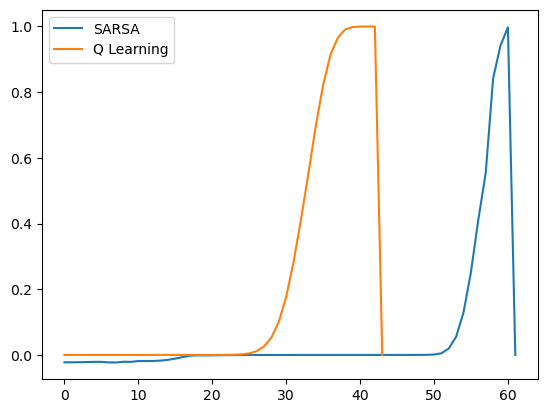

In [ ]:
plot_q_ev(policy_1, world, value_function_q_1, agent, actions=ACTIONS, label="SARSA")
plot_q_ev(policy_2, world, value_function_q_2, agent, actions=ACTIONS, label="Q Learning")
plt.legend()

Observamos que al incrementar el grado de exploración, Q-learning converge antes que SARSA. En experimentos previos, hemos notado que los algoritmos son altamente susceptibles a este parámetro, y que un cambio mínimo puede aumentar significativamente el tiempo de convergencia. Los valores que hemos utilizado y que parecían funcionar adecuadamente eran bastante bajos, alrededor de 0.1 o 0.01.

Para contrarrestar el hecho de que un valor alto de causaría fallos frecuentes en los últimos episodios (cuando se espera que ya se cuente con una política sólida), hemos incorporado un método de decaimiento: el valor de disminuye cada X iteraciones por un factor constante, permitiendo una alta exploración al principio, que se va reduciendo a medida que se aprende, para no comprometer demasiado el conocimiento adquirido. La implementación es bastante simple y se puede consultar en el código proporcionado anteriormente; además, al ponerlo a prueba, ha ofrecido resultados muy favorables (logramos que algunos mapas que no terminaban de converger lo hicieran al aplicar el decaimiento).


4.   Comentad las diferencias cuando se varían otros parámetros como el número de episodios, el ratio de aprendizaje ($\alpha$) o el factor de descuento ($\gamma$). ¿Qué valores dan mejores resultados?

        Vamos a empezar con el apartado con el parámetro $\gamma$. Se ha notado que, en el caso de los mapas más complejos y extensos, resulta más efectivo reducir ligeramente el valor de $\gamma$ y no planificar a tan largo plazo. Por ejemplo, en el mapa 1 de tamaño mediano
        , al utilizar un valor de $\gamma=1$, no logramos alcanzar la convergencia; sin embargo, al emplear un valor de $\gamma=0.9$, se consigue la convergencia en un breve período de tiempo.




In [ ]:
world= MAPS[1][1]
world_name = MAPS[1][0]
amount_of_episodes = MAPS[1][2]

agent = Agent(
      world=world, initial_state=INITIAL_STATE,
      obstacle_reward=-1,
      terminal_reward=1,
      free_celd_reward=0
    )

value_function_q ,policy ,converged, episodes, path_length = get_agent_policy(
      world, agent, alpha=0.1, epsilon=0.01,
      gamma=0.9, decay=1, decay_rate=10,
      amount_of_episodes=amount_of_episodes,
      update_function=Q_learning_optimization, max_steps=30000
    )

In [ ]:
show_policy(world_name, world, policy, converged, episodes, path_length)

Mundo 1 mediano: Laberinto fácil
[ V  X  >  >  V  X  >  >  V 
 V  X  ^  X  V  X  ^  X  V 
 V  X  ^  X  V  X  ^  X  V 
 V  X  ^  X  V  X  ^  X  V 
 V  X  ^  X  V  X  ^  X  V 
 V  X  ^  X  V  X  ^  X  V 
 V  X  ^  X  V  X  ^  X  V 
 V  X  ^  X  V  X  ^  X  V 
 >  >  ^  X  >  >  ^  X  ★]

Converged: True
Episodes needed to converge: 991
Length of the path taken: 48




No obstante, en la mayoría de los mapas, se obtienen mejores resultados manteniendo $\gamma=1$; de hecho, en muchos casos, al disminuir dicho valor, se pierde la convergencia.

En relación con la tasa de aprendizaje $\alpha$, generalmente se han observado los mejores resultados con un valor pequeño, alrededor de 0.1. A pesar de esto, en ciertos mapas específicos, se logra una mejora al aumentar este valor hasta 0.2 o incluso 0.5.

Además, el número de episodios también tiene un gran impacto. Según la longitud del mapa, se requieren desde unos pocos cientos hasta miles de episodios para alcanzar la convergencia. Solo en algunos casos excepcionales, este número aumenta significativamente, llegando a más de 30,000 en el mapa 1 grande con el agente 1 en SARSA.

También hemos decidido implementar un parámetro max_steps que limita el número máximo de pasos (actualizaciones de Q) que se pueden realizar en un episodio antes de considerarlo finalizado, evitando así episodios excesivamente largos. Hemos constatado que, en muchas situaciones, controlar este número y establecerlo en 1000 o 2000 permite obtener mejores resultados, ya que, aunque se puedan necesitar más episodios, el tiempo total de ejecución es considerablemente menor.